In [2]:
# Imports
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
# enable interactive plots
import matplotlib.pyplot as plt,mpld3
mpld3.enable_notebook()
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)
from IPython.html.widgets import interactive
from IPython.display import display
from scipy import signal

## Nonlinearities
In this lab, we will generate a band limited random signal and then model a nonlinearity.  From the model, we will observe the distortion effects on the signal.  As was discussed in the slides, passband nonlinearities can be modeled in the baseband, so we will restrict our attention to oversampled baseband signals.

### Step 1: Create Model Signal


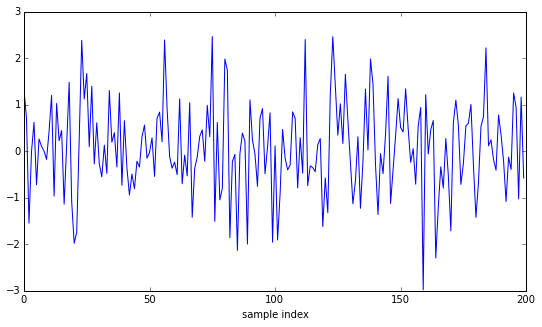

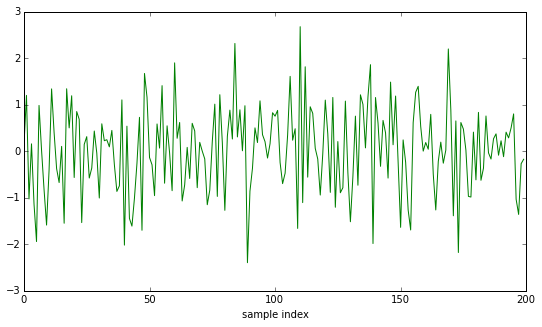

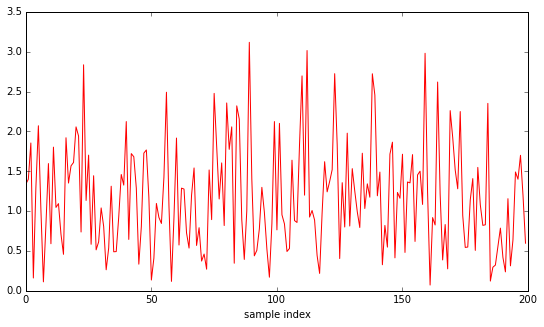

In [4]:
num_samples = 200

# set seed value (optional)
np.random.seed(10)

# generate numpy array of random numbers
x_real = np.random.randn(num_samples)
x_imag = np.random.randn(num_samples)
x = x_real + 1j*x_imag

# plot
plt.figure(1)
plt.plot(x_real,'b');
plt.xlabel('sample index');
plt.figure(2)
plt.plot(x_imag,'g');
plt.xlabel('sample index');

plt.figure(3)
plt.plot(abs(x),'r');
plt.xlabel('sample index');

### Step 2: Oversample

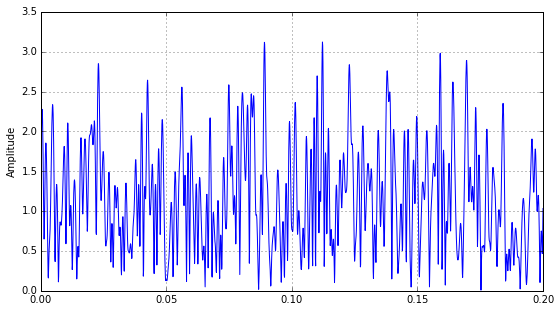

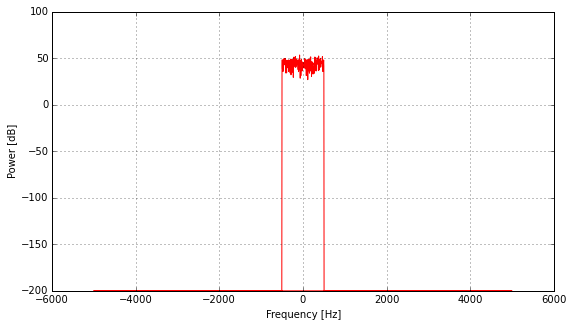

In [6]:
factor = 10
continuous_samples = x.size*factor
# print continuous_samples,x.size
x_continuous_real = signal.resample(x_real,continuous_samples)
x_continuous_imag = signal.resample(x_imag,continuous_samples)

x_continuous = x_continuous_real + 1j*x_continuous_imag
time_range = np.linspace(0,num_samples/1000,continuous_samples)
plt.plot(time_range,abs(x_continuous),'b');
plt.ylabel('Amplitude')
plt.grid(True)

def plot_spectrum(x,sample_rate,fig_num=1,col='b'):
    # Calculate DFT
    spectrum = np.fft.fft(x)

    # DFT frequencies
    freq = np.fft.fftfreq(x.size)

    # plot FFT
    plt.figure(fig_num)
#     plt.plot(freq)
    plt.plot(freq*sample_rate, 20*np.log10(abs(spectrum)+1e-10), col);
    plt.ylabel('Power [dB]');
    plt.xlabel('Frequency [Hz]');
    plt.grid(True)
    
plot_spectrum(x_continuous,factor*1000,fig_num=2,col='r')

### Step 3: Nonlinear Response

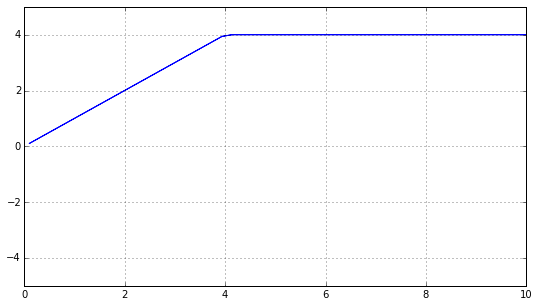

In [8]:
def soft_clip(x,max_value_in):
    mv = max_value_in*np.ones(x.size)
    mag = np.min(np.vstack((abs(x),mv)),0)
    return mag*np.exp(1j*np.angle(x))

clip_point = 4
x = np.linspace(-10,10,1e2)
plt.plot(abs(x),abs(soft_clip(x,clip_point)))
plt.ylim([-clip_point-1,clip_point+1]);
plt.grid(True)

### Step 4: Pass Signal Through Nonlinearity

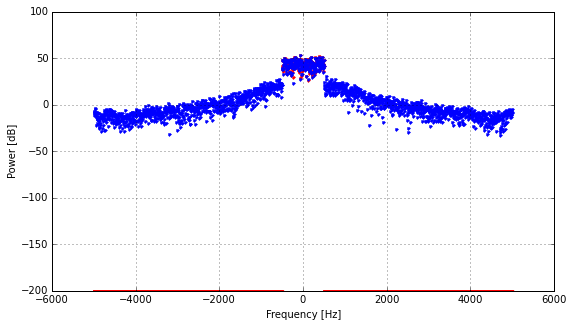

In [9]:
y = soft_clip(x_continuous,2.0)

plot_spectrum(x_continuous,factor*1000,fig_num=2,col='r.')
plot_spectrum(y,factor*1000,fig_num=2,col='b.')

### Step 5: Mitigate Nonlinearity with Backoff

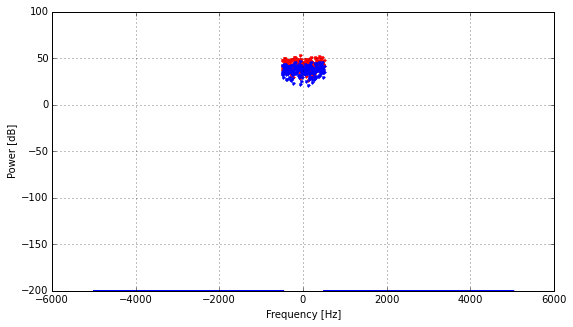

In [10]:
pre_gain = .5
y = soft_clip(pre_gain*x_continuous,2.0)

plot_spectrum(x_continuous,factor*1000,fig_num=2,col='r.')
plot_spectrum(y,factor*1000,fig_num=2,col='b.')

### Step 6: Create Interactive
Create an interactive element.

#### Inputs
- input back off
- clipping level

#### outputs
- time plot (before and after NL)
- spectrum plot (before and after NL)

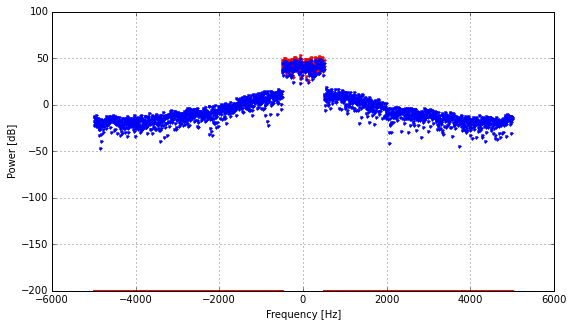

In [11]:
##########  Insert Code in this cell  ###########
def plot_NL_demo(pre_gain = .5 , clip_level = 2.0):  # add arguments and default values
    
#     pre_gain = .5
    y = soft_clip(pre_gain*x_continuous,clip_level)

    plot_spectrum(x_continuous,factor*1000,fig_num=2,col='r.')
    plot_spectrum(y,factor*1000,fig_num=2,col='b.')

interactive(plot_NL_demo, pre_gain = (.1,1), clip_level = (1,3.0))  # add arguments and ranges